In [1]:
import re
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Import Data
df = pd.read_csv("C:/Kuliah/Bangkit/Capstone/Dataset/Tambahan/play_stopword.csv", delimiter=';')

# Select specific columns using double square brackets
df = df[['at',"title", "label"]]

# Cut the last 10 characters in each cell of the specified column
df['at'] = df['at'].apply(lambda x: x[:-9] if len(x) > 10 else '')

df

,at,title,label
0,2023-11-18,ribet mengganti alamat surel aktif buka bantua...,Negative
1,2023-11-14,"kecewa aplikasi , bintang , udah x transaksi p...",Negative
2,2023-11-14,daftar harga langsung token listrik harga tota...,Negative
3,2023-11-06,jagan beli pulsa bualapak .. topup .. transfer...,Negative
4,2023-11-12,"pembelian dibatalkan , keterangannya pembeli y...",Negative
...,...,...,...
20937,2021-06-08,aplikasi udah bermanfaat bangett . please tamb...,Positive
20938,2019-06-17,"membantu , tolong kadang no plat aplikasi asli...",Positive
20939,2019-07-06,"halo admin . apk membantu , foreigner yg jelaj...",Positive
20940,2020-10-16,"pelanggan yth order gofood yg pesan , notifika...",Positive


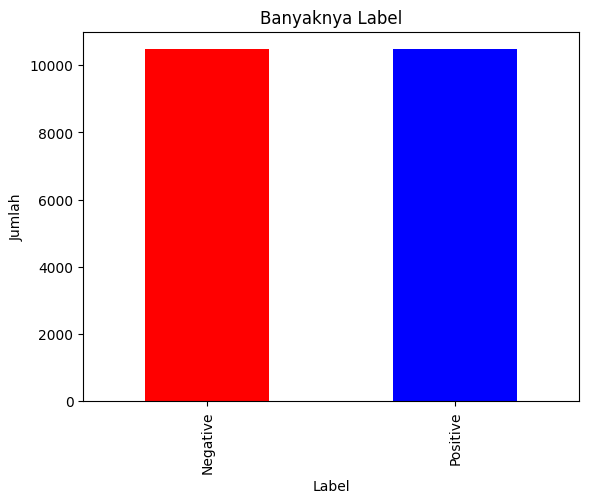

In [3]:
# Visualisasi banyaknya label
label_counts = df['label'].value_counts()
label_counts.plot(kind='bar', color=['red','blue'])

plt.title('Banyaknya Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

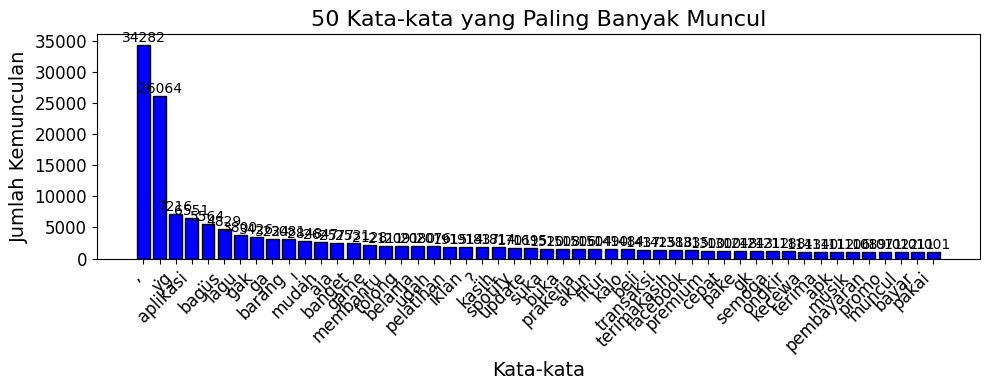

In [4]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = df['title'].str.split(expand=True).stack().value_counts()

# Memilih 20 kata teratas
top_words = word_counts.head(50)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(10, 4))
bars = plt.bar(top_words.index, top_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('50 Kata-kata yang Paling Banyak Muncul', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

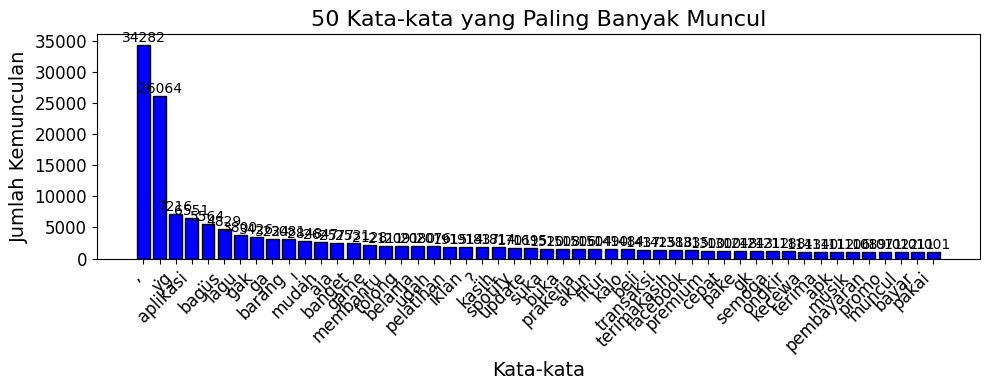

In [5]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = df['title'].str.split(expand=True).stack().value_counts()

# Memilih 20 kata teratas
top_words = word_counts.head(50)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(10, 4))
bars = plt.bar(top_words.index, top_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('50 Kata-kata yang Paling Banyak Muncul', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

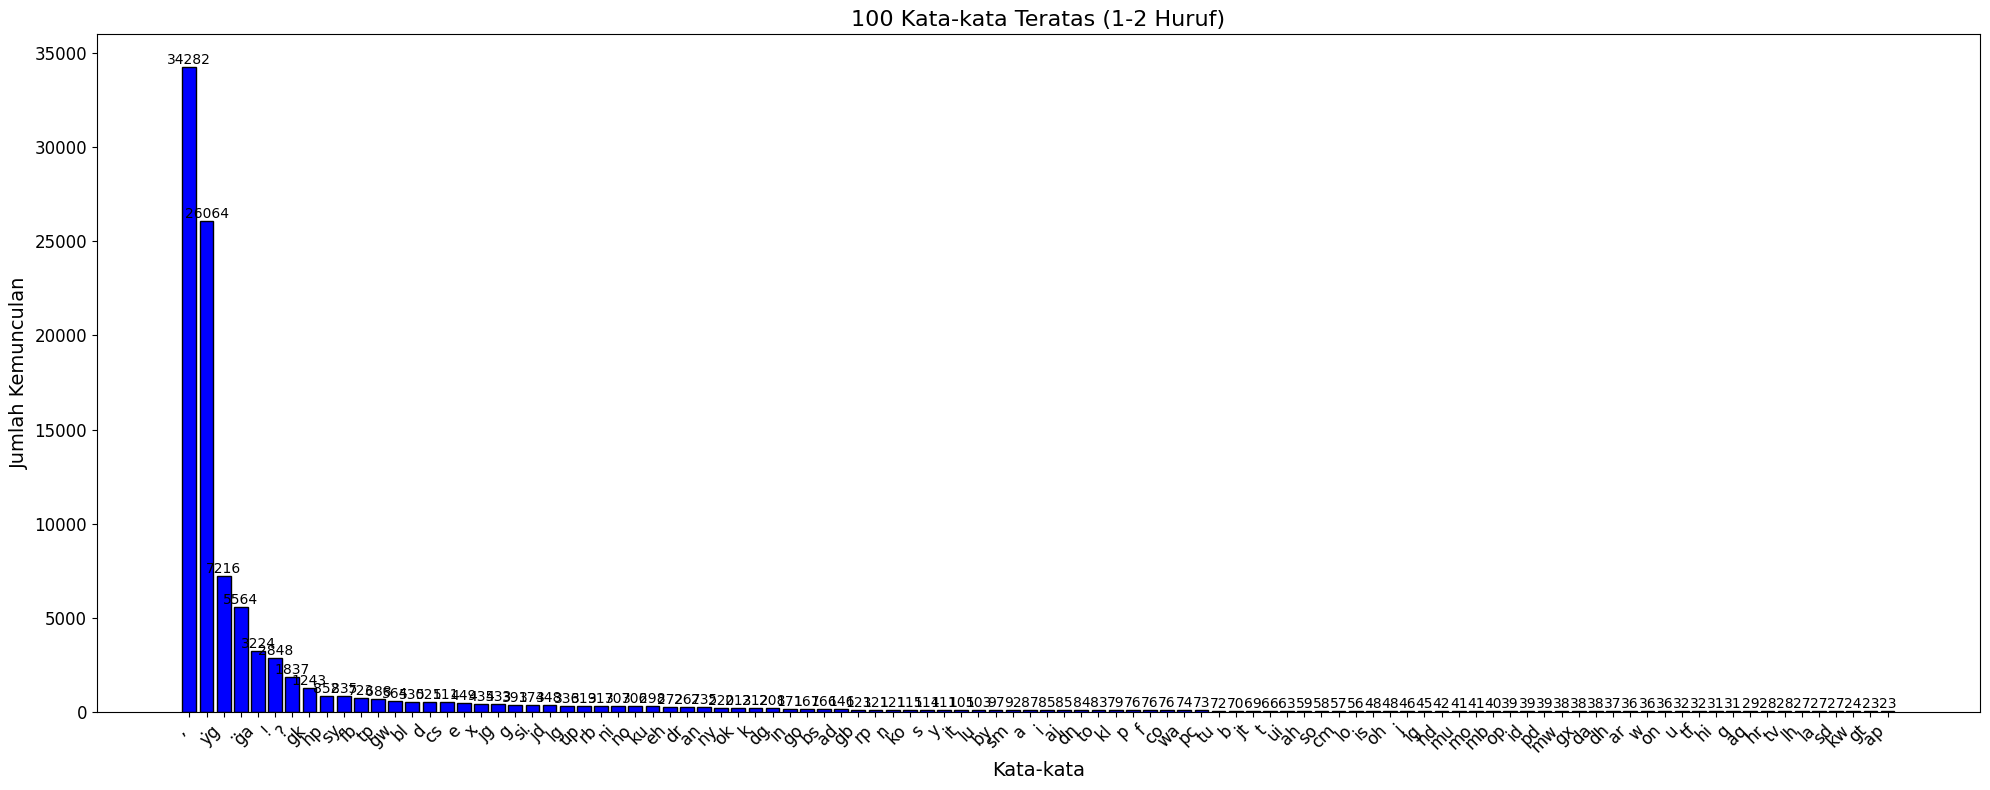

In [6]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = df['title'].str.split(expand=True).stack().value_counts()

# Memilih 50 kata teratas yang hanya terdiri dari 2 huruf
filtered_words = word_counts[(word_counts.index.str.len() <= 2)].head(100)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(20, 8))
bars = plt.bar(filtered_words.index, filtered_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('100 Kata-kata Teratas (1-2 Huruf)', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


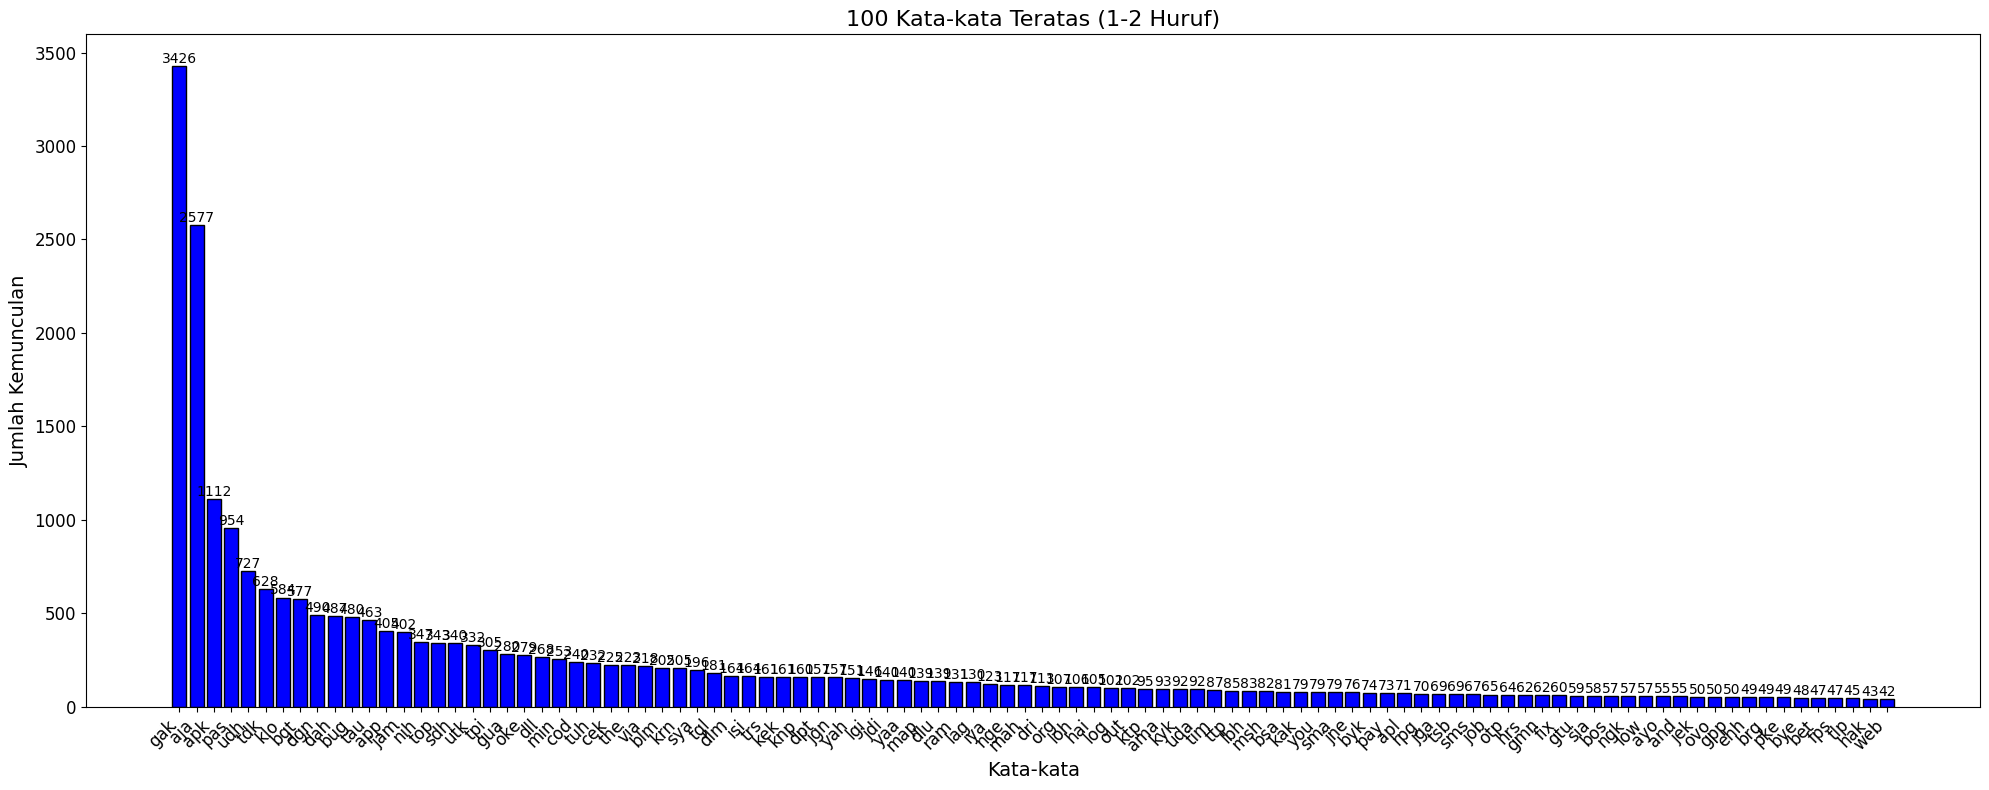

In [7]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = df['title'].str.split(expand=True).stack().value_counts()

# Memilih 50 kata teratas yang hanya terdiri dari 1-3 huruf
filtered_words = word_counts[(word_counts.index.str.len() == 3)].head(100)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(20, 8))
bars = plt.bar(filtered_words.index, filtered_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('100 Kata-kata Teratas (1-2 Huruf)', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


In [10]:
df['title']=df['title'].str.replace('gua', 'saya', case=False)
df['title']=df['title'].str.replace('gak', 'tidak', case=False)
df['title']=df['title'].str.replace('apk', 'aplikasi', case=False)
df['title']=df['title'].str.replace('udh', 'udah', case=False)
df['title']=df['title'].str.replace('tdk', 'tidak', case=False)
df['title']=df['title'].str.replace('app', 'aplikasi', case=False)

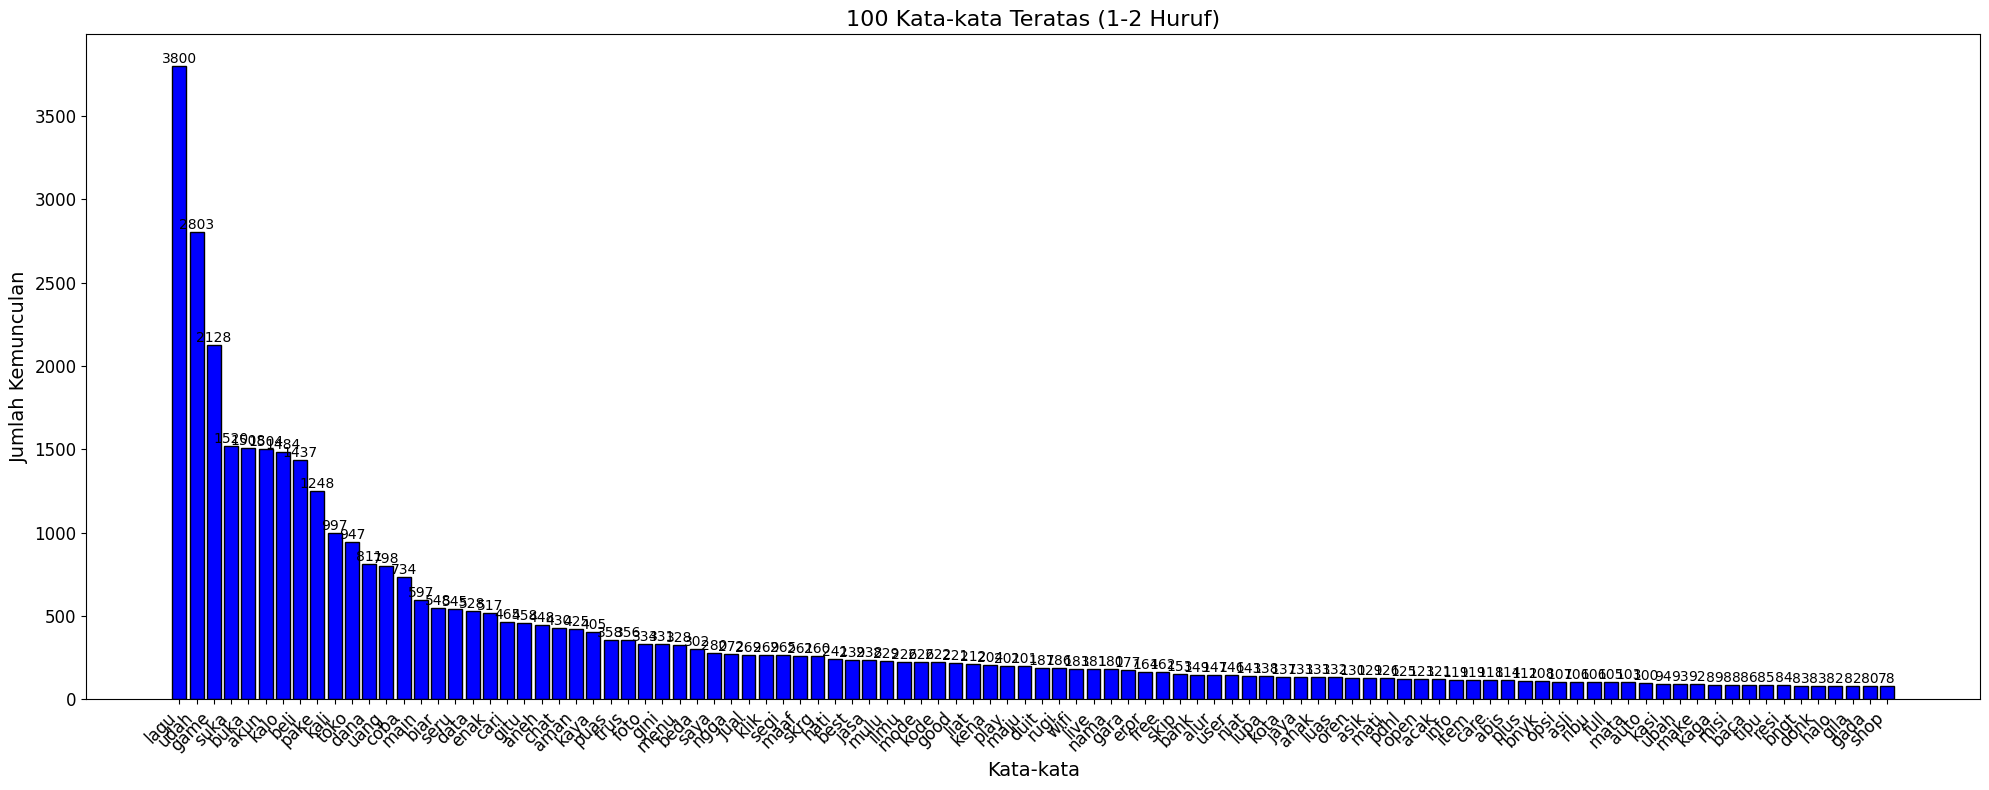

In [11]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = df['title'].str.split(expand=True).stack().value_counts()

# Memilih 50 kata teratas yang hanya terdiri dari 1-3 huruf
filtered_words = word_counts[(word_counts.index.str.len() == 4)].head(100)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(20, 8))
bars = plt.bar(filtered_words.index, filtered_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('100 Kata-kata Teratas (1-2 Huruf)', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


In [16]:
df['title']=df['title'].str.replace(',', '', case=False)
df['title']=df['title'].str.replace('..', '', case=False)
df['title']=df['title'].str.replace('?', '', case=False)

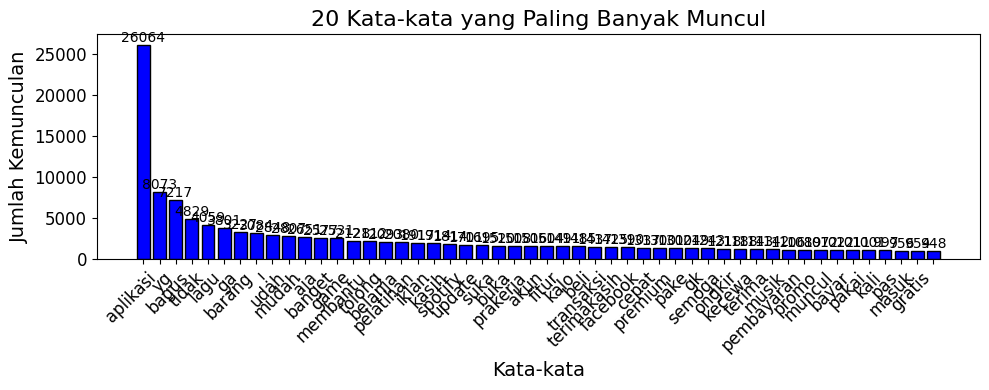

In [17]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = df['title'].str.split(expand=True).stack().value_counts()

# Memilih 20 kata teratas
top_words = word_counts.head(50)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(10, 4))
bars = plt.bar(top_words.index, top_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('20 Kata-kata yang Paling Banyak Muncul', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

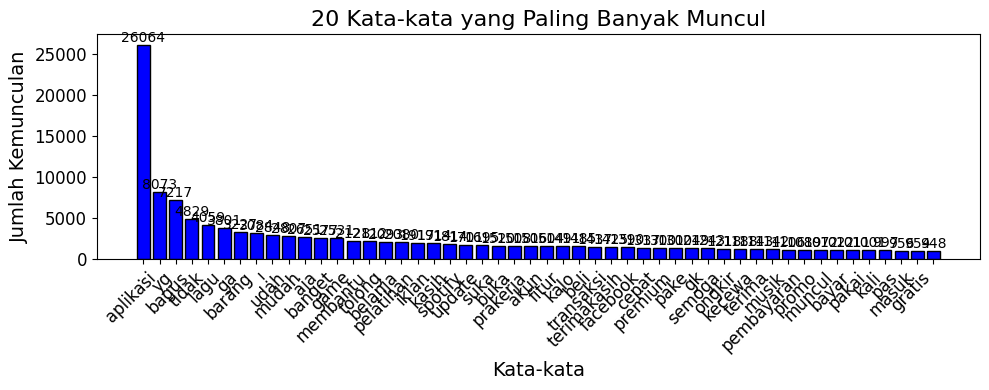

In [18]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = df['title'].str.split(expand=True).stack().value_counts()

# Memilih 20 kata teratas
top_words = word_counts.head(50)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(10, 4))
bars = plt.bar(top_words.index, top_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('20 Kata-kata yang Paling Banyak Muncul', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Oriza
[nltk_data]     Sativa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


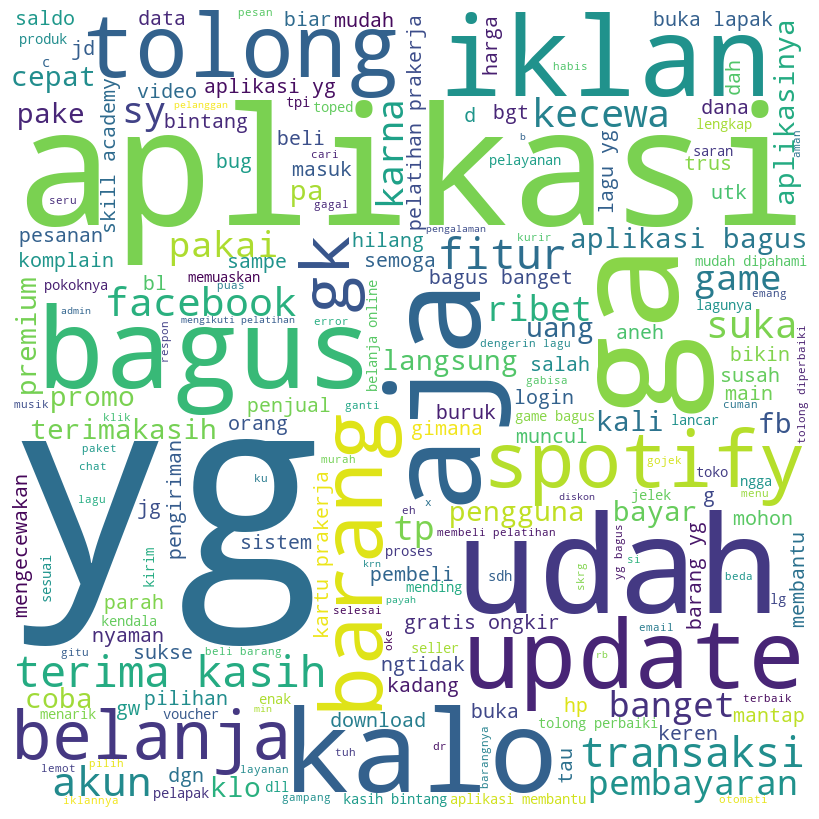

In [21]:
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

# Mendownload daftar kata yang ada (vocabulary)
nltk.download('stopwords')
from nltk.corpus import stopwords
# Assuming 'data_coment' is a DataFrame with a column 'Hasil_prepo'

comment_words = ''
stopwords_set = set(stopwords.words('indonesian'))

# iterate through the DataFrame
for val in df['title']:
    # typecast each val to string
    val = str(val)
    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords_set,
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [22]:
# Label encoding untuk kolom 'label'
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Split data menjadi train dan test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['title'], df['label'], test_size=0.2, random_state=42
)

In [23]:
# Tokenisasi
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data)

# Sequencing dan padding
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

train_padded = pad_sequences(train_sequences, maxlen=50, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=50, padding='post', truncating='post')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
from keras.callbacks import ModelCheckpoint

# Definisi model
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menyusun ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# Melatih model dengan menggunakan callback ModelCheckpoint
history = model.fit(train_padded, train_labels,
                    epochs=25,
                    validation_data=(test_padded, test_labels),
                    callbacks=[checkpoint])



Epoch 1/25


523/524 [============================>.] - ETA: 0s - loss: 0.3523 - accuracy: 0.8451
Epoch 1: val_accuracy improved from -inf to 0.92074, saving model to best_model.h5
524/524 [==============================] - 9s 13ms/step - loss: 0.3521 - accuracy: 0.8453 - val_loss: 0.2244 - val_accuracy: 0.9207
Epoch 2/25
  5/524 [..............................] - ETA: 7s - loss: 0.1993 - accuracy: 0.9312

C:\Users\Oriza Sativa\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


521/524 [============================>.] - ETA: 0s - loss: 0.1876 - accuracy: 0.9363
Epoch 2: val_accuracy improved from 0.92074 to 0.92504, saving model to best_model.h5
524/524 [==============================] - 7s 13ms/step - loss: 0.1872 - accuracy: 0.9363 - val_loss: 0.2131 - val_accuracy: 0.9250
Epoch 3/25
521/524 [============================>.] - ETA: 0s - loss: 0.1492 - accuracy: 0.9519
Epoch 3: val_accuracy improved from 0.92504 to 0.92862, saving model to best_model.h5
524/524 [==============================] - 7s 13ms/step - loss: 0.1496 - accuracy: 0.9518 - val_loss: 0.1982 - val_accuracy: 0.9286
Epoch 4/25
523/524 [============================>.] - ETA: 0s - loss: 0.1279 - accuracy: 0.9597
Epoch 4: val_accuracy did not improve from 0.92862
524/524 [==============================] - 7s 13ms/step - loss: 0.1279 - accuracy: 0.9598 - val_loss: 0.2057 - val_accuracy: 0.9241
Epoch 5/25
523/524 [============================>.] - ETA: 0s - loss: 0.1202 - accuracy: 0.9623
Epoch 5:

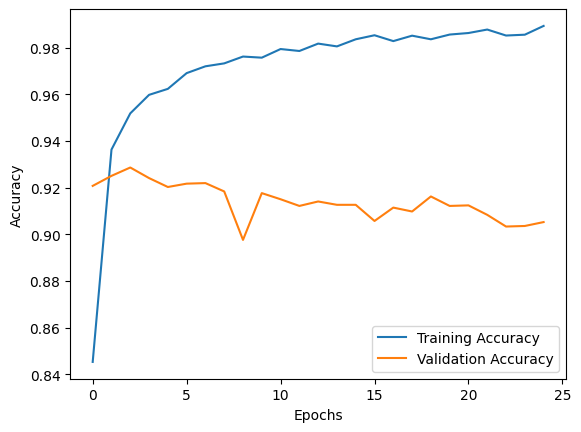

In [26]:
# Plot akurasi training dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
from keras.models import load_model
# Memuat model yang telah disimpan
loaded_model = load_model('best_model.h5')  # Ganti 'best_model.h5' dengan nama file model yang sesuai

# Melakukan prediksi pada data uji
predictions = loaded_model.predict(test_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

# Evaluasi
accuracy = accuracy_score(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


131/131 [==============================] - 1s 5ms/step
Accuracy: 0.9286225829553593
Confusion Matrix:
[[1977  135]
 [ 164 1913]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2112
           1       0.93      0.92      0.93      2077

    accuracy                           0.93      4189
   macro avg       0.93      0.93      0.93      4189
weighted avg       0.93      0.93      0.93      4189

